In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

from keras.datasets import mnist

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


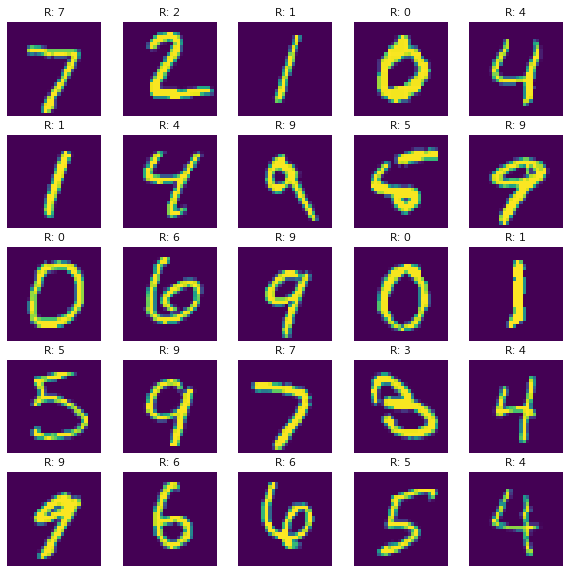

In [2]:
# 데이터 확인
width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i]))
    sub_plt.set_title(sub_plt_title)

plt.show() 

### MLP

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
width=28
height=28

# 데이터가 0 부터 255로 구성되어 있음으로 255로 나누어서 정규화
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(784, input_dim=width*height, activation='relu')) # 입력 값: 784
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=10)

start = time.time()
# validation_split = 0.33: 33% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.33, shuffle=True, epochs=2, 
                     batch_size=50, callbacks=[early_stopping])
end = time.time()
print('Runtime: %0.2f 초' % (end-start))
# CPU: 43.29 s,  Colab CPU: 36 s
# GPU: 20.88 s,  Colab GPU: 16 s, Colab TPU: 30 s 

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 11s 275us/step - loss: 0.2183 - acc: 0.9350 - val_loss: 0.1543 - val_acc: 0.9497
Epoch 2/2
40199/40199 [==============================] - 10s 239us/step - loss: 0.0827 - acc: 0.9738 - val_loss: 0.1100 - val_acc: 0.9658
Runtime: 20.88 초


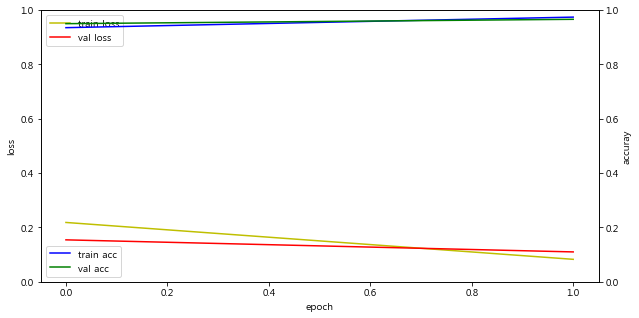

In [3]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [4]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('손실값:',loss_and_metrics[0], ' 정확도:', (loss_and_metrics[1] * 100))

# 모델 사용하기, R: 5 P: 6 잘못된 예측
yp = model.predict(x_test, batch_size=32)

cnt = 0
i = 0

while cnt < 25:
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yp[i]))
    print(sub_plt_title)

    i += 1    
    cnt += 1

10000/10000 [==============================] - 1s 113us/step
## evaluation loss and_metrics ##
손실값: 0.094384563572146  정확도: 97.08
R: 7 P: 7
R: 2 P: 2
R: 1 P: 1
R: 0 P: 0
R: 4 P: 4
R: 1 P: 1
R: 4 P: 4
R: 9 P: 9
R: 5 P: 6
R: 9 P: 9
R: 0 P: 0
R: 6 P: 6
R: 9 P: 9
R: 0 P: 0
R: 1 P: 1
R: 5 P: 5
R: 9 P: 9
R: 7 P: 7
R: 3 P: 3
R: 4 P: 4
R: 9 P: 9
R: 6 P: 6
R: 6 P: 6
R: 5 P: 5
R: 4 P: 4


10000/10000 [==============================] - 1s 96us/step
## evaluation loss and_metrics ##
손실값: 0.094384563572146  정확도: 97.08


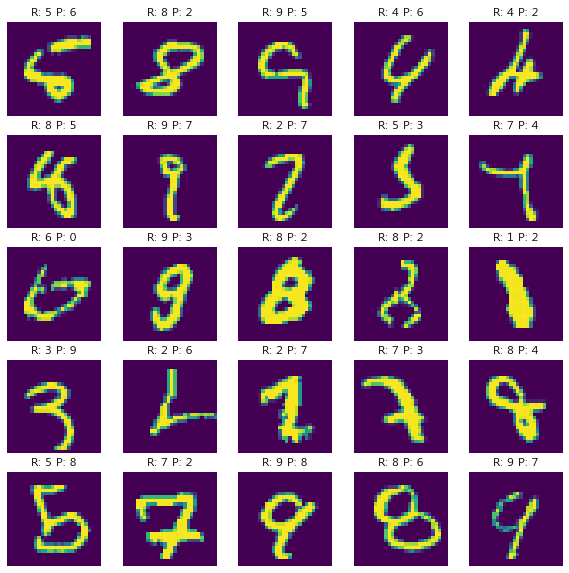

In [6]:
# 오답 이미지만 출력
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('손실값:',loss_and_metrics[0], ' 정확도:', (loss_and_metrics[1] * 100))

yp = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yp[i]):
        i += 1
        continue # 정답일 경우 출력 안함.
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yp[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()



### Conv, CNN

In [6]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
width=28
height=28

# 데이터가 0 부터 255로 구성되어 있음으로 255로 나누어서 정규화
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
# 32: 마스크(커널, 필터)의 갯수
# (3, 3): 마스크(커널, 필터)의 크기
# input_shape = (width, height, 1): 28 X 28 픽셀의 흑백(1) 이미지
model.add(Conv2D(32, (3, 3), input_shape = (width, height, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # 2차원 텐서를 1차원 텐서로 변환

model.add(Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=10)

start = time.time()
# validation_split = 0.33: 33% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.33, shuffle=True, epochs=2, 
                     batch_size=50, callbacks=[early_stopping])
end = time.time()
print('Runtime: %0.2f 초' % (end-start))
# CPU: 345 초
# GPU: 30 초, Colab GPU: 23.54, Colab,  TPU: 219 

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 13s 335us/step - loss: 0.1970 - acc: 0.9395 - val_loss: 0.0823 - val_acc: 0.9753
Epoch 2/2
40199/40199 [==============================] - 13s 330us/step - loss: 0.0673 - acc: 0.9795 - val_loss: 0.0675 - val_acc: 0.9790
Runtime: 27.04 초


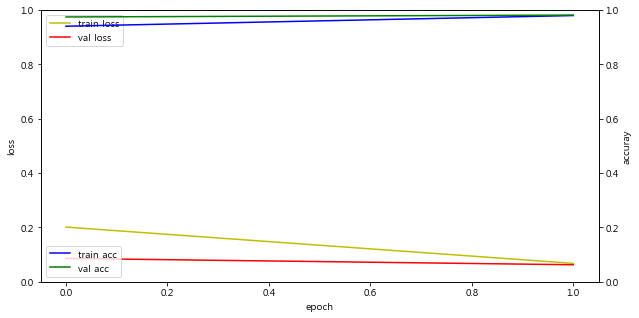

In [3]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [4]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('손실값:',loss_and_metrics[0], ' 정확도:', (loss_and_metrics[1] * 100))

# 모델 사용하기, R: 5 P: 6 잘못된 예측
yp = model.predict(x_test, batch_size=32)

cnt = 0
i = 0

while cnt < 25:
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yp[i]))
    print(sub_plt_title)

    i += 1    
    cnt += 1

10000/10000 [==============================] - 2s 174us/step
## evaluation loss and_metrics ##
손실값: 0.05141944925226271  정확도: 98.50999999999999
R: 7 P: 7
R: 2 P: 2
R: 1 P: 1
R: 0 P: 0
R: 4 P: 4
R: 1 P: 1
R: 4 P: 4
R: 9 P: 9
R: 5 P: 5
R: 9 P: 9
R: 0 P: 0
R: 6 P: 6
R: 9 P: 9
R: 0 P: 0
R: 1 P: 1
R: 5 P: 5
R: 9 P: 9
R: 7 P: 7
R: 3 P: 3
R: 4 P: 4
R: 9 P: 9
R: 6 P: 6
R: 6 P: 6
R: 5 P: 5
R: 4 P: 4


10000/10000 [==============================] - 2s 163us/step
## evaluation loss and_metrics ##
손실값: 0.05141944925226271  정확도: 98.50999999999999


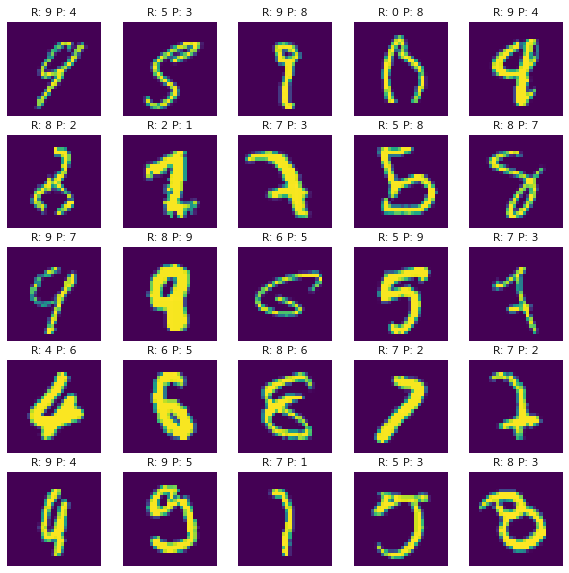

In [5]:
# 오답 이미지만 출력
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('손실값:',loss_and_metrics[0], ' 정확도:', (loss_and_metrics[1] * 100))

yp = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yp[i]):
        i += 1
        continue # 정답일 경우 출력 안함.
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yp[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()

